<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

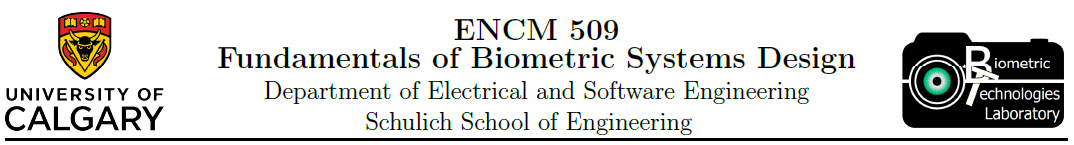

# Lab 2 report

| Student name | UCID |
| -------------|----:|
| Rian Opperman | 30118288 |
|Mohammed Alshoura | 30126200|

## Introduction

This lab's purpose is to become more familiar and comfortable with signature data acquisition, as well as statistical analysis of said data, which are key steps prior to implementing verification or recognition of the data. In this lab we used a pen tablet to draw signatures and record their pressure values, as well as the x, y and time values (for calculating the velocity of our signature) while we wrote our signature.

> *Note: Due to the pen tablet malfunctioning during the lab, we are unable to use our recorded signatures as the pressure data was recorded as a constant 0. We instead used the 'biometrics' sample dataset for our analysis.*

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd
from scipy.stats import norm

# to keep a good size for the plot figure, not the plot area!
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

## Exercise 1

Text(0.5, 0, 'Population values')

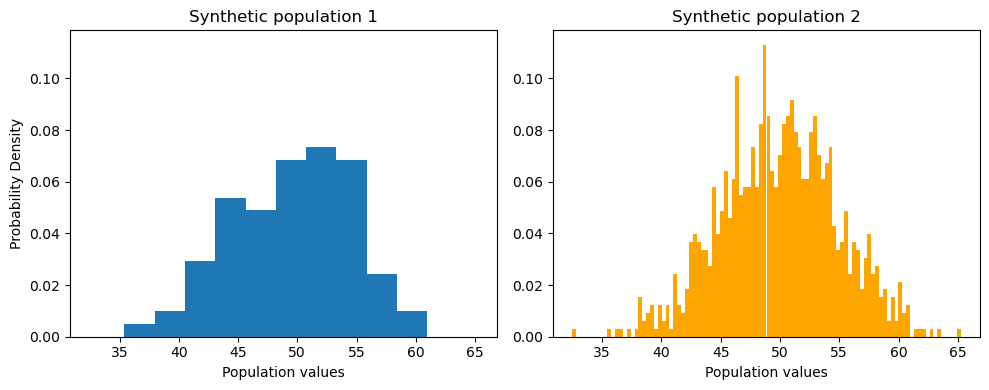

In [58]:
# Theorectical Mean and Std
mu = 50
std = 5
qtt_samples = 80

pop_norm_1 = norm.rvs(mu, std, size=qtt_samples)
pop_norm_2 = norm.rvs(mu, std, 1000)

plt.figure(figsize=(10,4))

ax1 = plt.subplot(1,2,1)
plt.hist(pop_norm_1, density=True)
plt.title("Synthetic population 1")
plt.ylabel("Probability Density")
plt.xlabel("Population values")

plt.subplot(1,2,2, sharex=ax1, sharey=ax1)
plt.hist(pop_norm_2, bins=100, density=True, color='orange')
plt.title("Synthetic population 2")
plt.xlabel("Population values")

Text(0.5, 0, 'Population values')

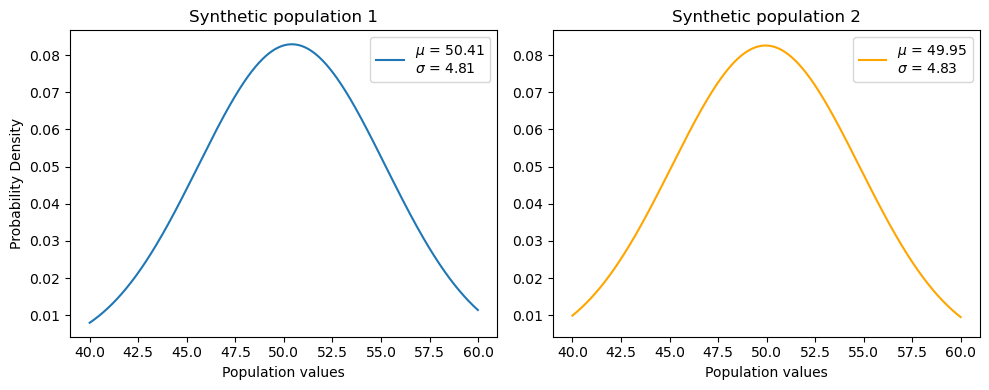

In [57]:
x = np.arange(40, 60, 0.01)
yticks = np.arange(np.min(pop_norm_1), np.max(pop_norm_1), 0.01)

mu_pop_1 = np.mean(pop_norm_1)
mu_pop_2 = np.mean(pop_norm_2)
std_pop_1 = np.std(pop_norm_1)
std_pop_2 = np.std(pop_norm_2)

pop_pdf_1 = norm.pdf(x, mu_pop_1, std_pop_1)
pop_pdf_2 = norm.pdf(x, mu_pop_2, std_pop_2)

plt.figure(figsize=(10,4))

ax2 = plt.subplot(1,2,1)
plt.plot(x, pop_pdf_1)
plt.legend([f"$\\mu$ = {mu_pop_1:.2f}\n$\\sigma$ = {std_pop_1:.2f}"])
plt.title("Synthetic population 1")
plt.ylabel("Probability Density")
plt.xlabel("Population values")

plt.subplot(1,2,2, sharex=ax2, sharey=ax2)
plt.plot(x, pop_pdf_2, 'orange')
plt.legend([f"$\\mu$ = {mu_pop_2:.2f}\n$\\sigma$ = {std_pop_2:.2f}"])
plt.title("Synthetic population 2")
plt.xlabel("Population values")

Text(0.5, 0, 'Population values')

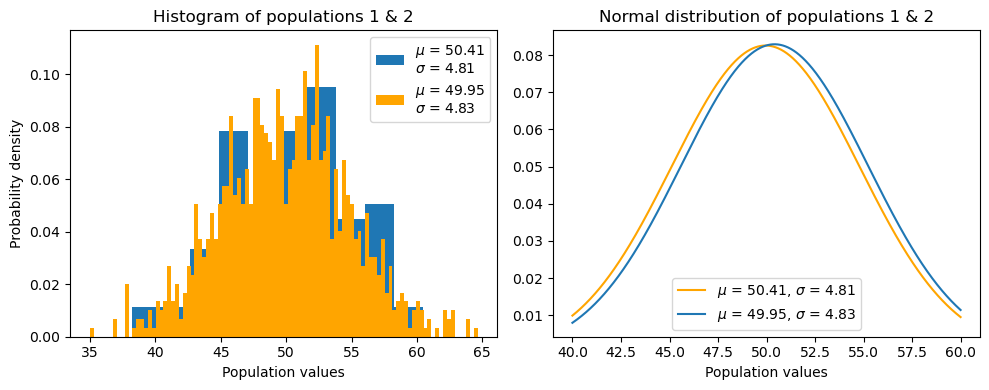

In [56]:
plt.figure(figsize=(10,4))

ax2 = plt.subplot(1,2,1)
plt.hist(pop_norm_1, density=True)
plt.hist(pop_norm_2, bins=100, density=True, color='orange')
plt.legend([f"$\\mu$ = {mu_pop_1:.2f}\n$\\sigma$ = {std_pop_1:.2f}", f"$\\mu$ = {mu_pop_2:.2f}\n$\\sigma$ = {std_pop_2:.2f}"])
plt.title("Histogram of populations 1 & 2")
plt.xlabel("Population values")
plt.ylabel("Probability density")

plt.subplot(1,2,2)
plt.plot(x, pop_pdf_2, color='orange')
plt.plot(x, pop_pdf_1)
plt.legend([f"$\\mu$ = {mu_pop_1:.2f}, $\\sigma$ = {std_pop_1:.2f}", f"$\\mu$ = {mu_pop_2:.2f}, $\\sigma$ = {std_pop_2:.2f}"])
plt.title("Normal distribution of populations 1 & 2")
plt.xlabel("Population values")

### Analysis

Comparing the calculations and graphs produced above, we can see that with more samples we arrive closer to the 'true' mean and standard deviation. For example, the 80 sample data set's standard deviation is farther from the true value of `5` than the 1000 sample data set, and the 1000 sample data set generally is closer to the true mean of `50` than the 80 sample data set, however variability in generating the data set does sometimes lead to the 80 sample data set being closer to the 'true' mean.

As well, when considering the histograms produced and the differing amount of 'bins' used, we can see that generally with more bins we achieve greater fidelity in our data and with more bins we arrive at an almost Normal distribution like shape. This also helps further strengthen the inherent connection between the Probability Density function and the frequency of values in the dataset.

## Exercise 2

In [51]:
# As stated in the introduction, we are using the Biometrics
# sample data as our pen tablet corrupted the pressure values
# and saved the pressure as a constant value.

subdir = 'impostor/'
data_dir = 'signature_samples/biometrics/' + subdir

csv_file = pd.read_csv(data_dir + '21.csv')

coord1 = csv_file[['X', 'Y']].to_numpy()
time1 = csv_file['Time'].to_numpy().reshape((-1,1))
prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

csv_file.head()

,X,Y,Pressure,Time
0,86.103801,68.845620,0.013672,0
1,86.103801,67.830876,0.113498,2
2,86.103801,68.845620,0.046937,2
3,86.103801,67.830876,0.148717,15
4,86.103801,67.830876,0.148717,15


In [52]:
# To correctly map the pressure into the colormap, normalization is required 
prs1 = prs1 / np.max(prs1) * 255
prs1 = prs1.astype(int)

pressuremap = plt.get_cmap('jet', np.max(prs1)+1)

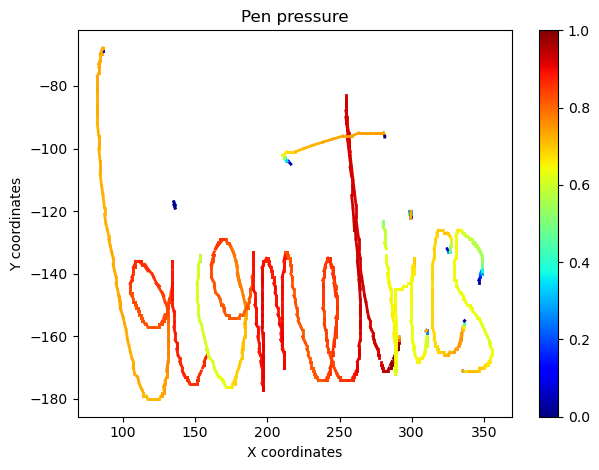

In [53]:
fig, ax = plt.subplots()

for i in range(len(prs1)-1):
    c = pressuremap(prs1[i]).squeeze()
    
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff == 0:
        time_diff = 0.0001
        
    if time_diff < 17: # You may need to change this threshould
        ax.plot(coord1[i:i+2, 0], -coord1[i:i+2, 1], linewidth=2, color=c)

plt.xlabel('X coordinates')
plt.ylabel('Y coordinates')
plt.title('Pen pressure')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm, ax=ax)

plt.show()

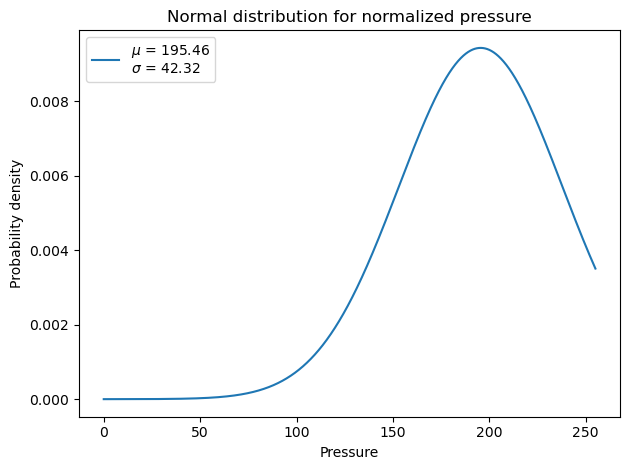

In [61]:
prs1_arranged = np.arange(prs1.min(), prs1.max(), 0.01)

mu_prs1 = np.mean(prs1)
std_prs1 = np.std(prs1)

prs1_pdf = norm.pdf(prs1_arranged, mu_prs1, std_prs1)


plt.plot(prs1_arranged, prs1_pdf)
plt.legend([f"$\\mu$ = {mu_prs1:.2f}\n$\\sigma$ = {std_prs1:.2f}"])
plt.title("Normal distribution for normalized pressure")
plt.ylabel("Probability density")
plt.xlabel("Pressure")
plt.show()

## Exercise 3

#### Below is the code to calculate velocity and plot velocity map of one signature: Explain why do we check for the condition if time_diff != 0:?

The check is done to avoid dividing by zero since it would cause errors, if two rows (measurements) are taken close enough to each other, they would show up with the same value for time, which would make time_diff equal to zero

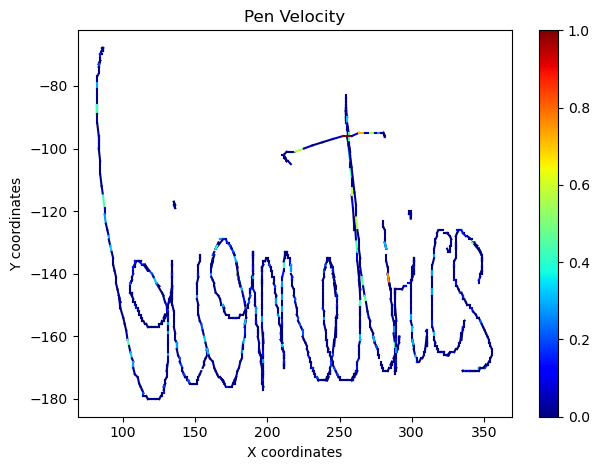

In [62]:
vel = np.zeros((len(time1)-1, 1))
fig, ax = plt.subplots()
for i in range(len(time1)-1):
    distance = np.sqrt((coord1[i+1,0] - coord1[i,0])**2 + 
                       (coord1[i+1,1] - coord1[i,1])**2)

    # if too fast, time_diff = 0
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff != 0:
        vel[i] = distance / time_diff
    vel[i] = int(vel[i].item() * 1000) + 1

vel = np.insert(vel, 0, 1)
vel = vel / np.max(vel) * 255
vel = vel.astype(int)

velmap = plt.get_cmap('jet', np.max(vel)+1)

for i in range(len(vel)-1):
    c = velmap(vel[i])
    
    time_diff = abs(time1[i+1] - time1[i])
        
    if time_diff < 17: # You may need to change this threshould
        ax.plot(coord1[i:i+2,0], -coord1[i:i+2,1], c=c)
plt.title('Pen Velocity')
plt.xlabel('X coordinates')
plt.ylabel('Y coordinates')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm, ax = ax)
plt.show()

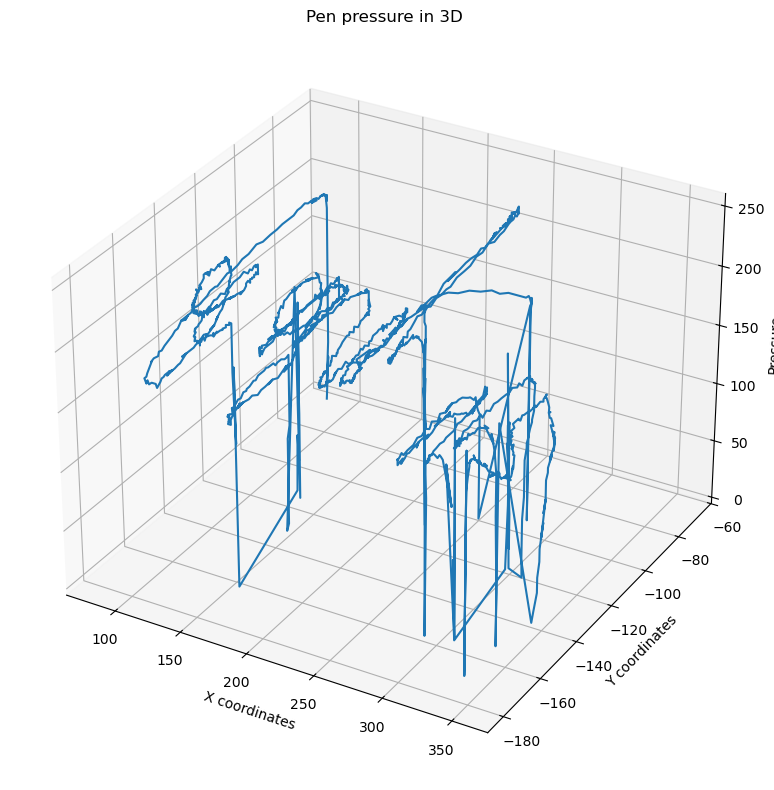

In [63]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.plot3D(coord1[:,0].flatten(), -coord1[:,1].flatten(), prs1.flatten())
ax.set_xlabel('X coordinates')
ax.set_ylabel('Y coordinates')
ax.set_zlabel('Pressure')
ax.set_title('Pen pressure in 3D')
plt.show()

## Exercise 4

In [12]:
def calc_velocity(time, coords):
    vel = np.zeros((len(time)-1, 1))

    for i in range(len(time)-1):
        distance = np.sqrt((coords[i+1,0] - coords[i,0])**2 +
                           (coords[i+1,1] - coords[i,1])**2)
        
        # if too fast time_diff = 0
        time_diff = time[i+1] - time[i]
        if time_diff == 0:
            time_diff = 0.0001

        vel[i] = distance / time_diff
        vel[i] = int(vel[i].item() * 1000) + 1

    vel = np.insert(vel, 0, 1)
    vel = vel / np.max(vel) * 255
    vel = vel.astype(int)
    
    return vel

In [13]:
base_dataset = "encm509"
subdir = "genuine"
data_dir = f'signature_samples/{base_dataset}/{subdir}'

pressures = []
velocity = []

for i in range(30):
    csv_file = pd.read_csv(f"{data_dir}/{i+1}.csv")
    
    coords = csv_file[['X', 'Y']].to_numpy()
    time = csv_file['Time'].to_numpy().reshape((-1,1))
    prs = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time, coords)
    
    prs = prs / np.max(prs) * 255
    prs = prs.astype(int)
    # Should we not filter?
    prs = [ x for x in prs if 150 < x < 250 ]

    velocity = np.append(velocity, vel)
    pressures = np.append(pressures, prs)

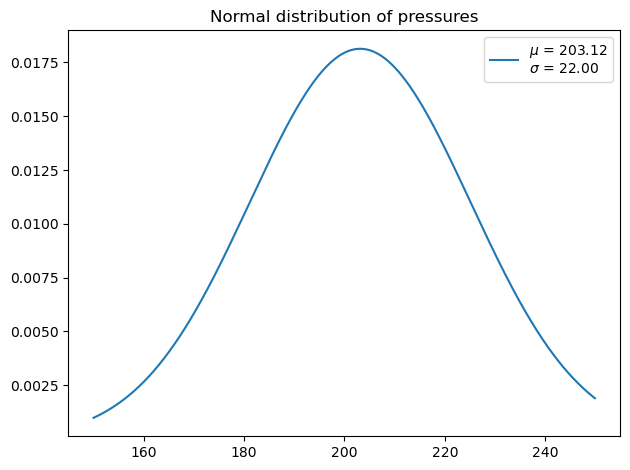

In [14]:
x = np.arange(150, 250, 0.1)

p_mu = np.mean(pressures)
p_std = np.std(pressures)

v_mu = np.mean(velocity)
v_std = np.std(velocity)

p_norm_dist = norm(p_mu, p_std)
v_norm_dist = norm(v_mu, v_std)

plt.plot(x, norm.pdf(x, p_mu, p_std))
plt.title("Normal distribution of pressures")
plt.legend([f"$\\mu$ = {p_mu:.2f}\n$\\sigma$ = {p_std:.2f}"])
plt.show()

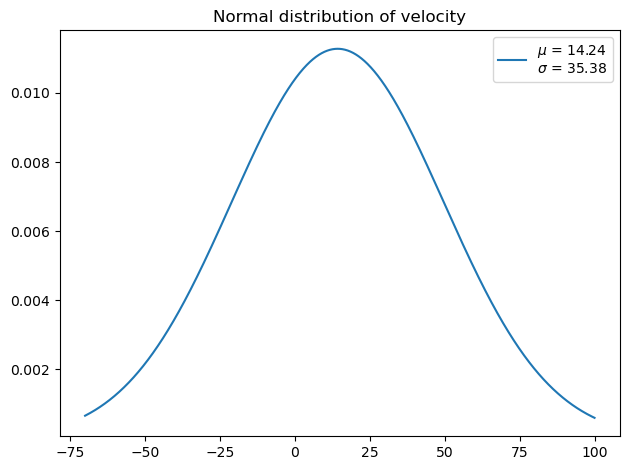

In [15]:
x = np.arange(-70, 100, 0.1)

plt.plot(x, norm.pdf(x, v_mu, v_std))
plt.title("Normal distribution of velocity")
plt.legend([f"$\\mu$ = {v_mu:.2f}\n$\\sigma$ = {v_std:.2f}"])

## Exercise 4 (Alt. version)

In [16]:
base_dataset = "biometrics"
subdir = "genuine"
data_dir = f'signature_samples/{base_dataset}/{subdir}'

genuine_pressures = np.zeros((30, 2))
genuine_velocity = np.zeros((30, 2))

for i in range(30):
    csv_file = pd.read_csv(f"{data_dir}/{i+1}.csv")
    
    coords = csv_file[['X', 'Y']].to_numpy()
    time = csv_file['Time'].to_numpy().reshape((-1,1))
    prs = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time, coords)
    
    prs = prs / np.max(prs) * 255
    prs = prs.astype(int)

    genuine_velocity[i, 0] = np.mean(vel)
    genuine_velocity[i, 1] = np.std(vel)

    genuine_pressures[i, 0] = np.mean(prs)
    genuine_pressures[i, 1] = np.std(prs)


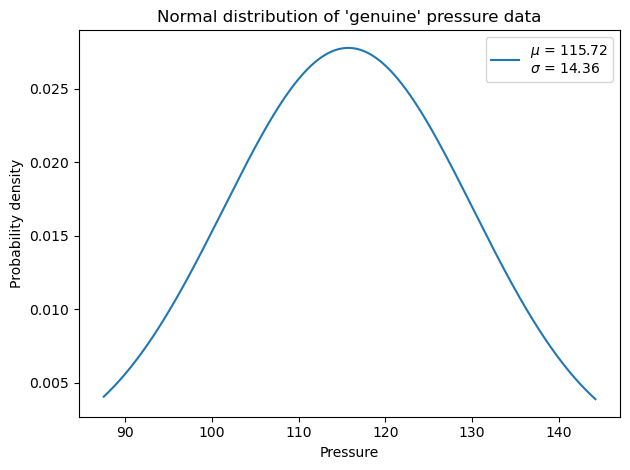

In [65]:
means_array = genuine_pressures[:,0]

arranged_genuine_pressures = np.arange(min(means_array), max(means_array), 0.01)
genuine_pressure_mean = np.mean(means_array)
genuine_pressure_std = np.std(means_array)

genuine_pressure_pdf = norm.pdf(arranged_genuine_pressures, genuine_pressure_mean, genuine_pressure_std)

plt.plot(arranged_genuine_pressures, genuine_pressure_pdf)
plt.title("Normal distribution of 'genuine' pressure data")
plt.legend([f"$\\mu$ = {genuine_pressure_mean:.2f}\n$\\sigma$ = {genuine_pressure_std:.2f}"])
plt.xlabel('Pressure')
plt.ylabel('Probability density')
plt.show()

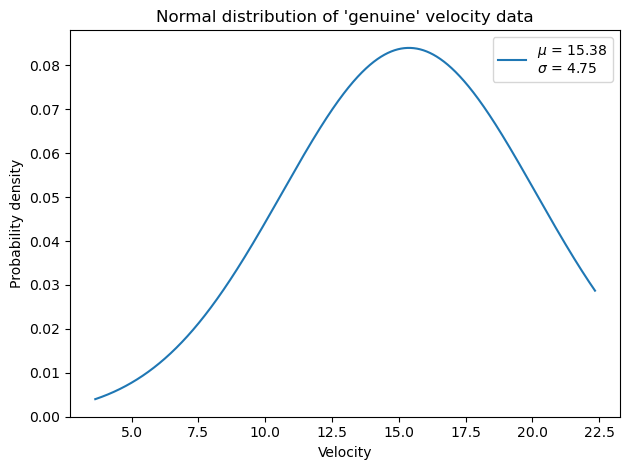

In [67]:
means_array = genuine_velocity[:,0]

arranged_genuine_velocity = np.arange(min(means_array), max(means_array), 0.01)
genuine_velocity_mean = np.mean(means_array)
genuine_velocity_std = np.std(means_array)

genuine_velocity_pdf = norm.pdf(arranged_genuine_velocity, genuine_velocity_mean, genuine_velocity_std)

plt.plot(arranged_genuine_velocity, genuine_velocity_pdf)
plt.title("Normal distribution of 'genuine' velocity data")
plt.legend([f"$\\mu$ = {genuine_velocity_mean:.2f}\n$\\sigma$ = {genuine_velocity_std:.2f}"])
plt.xlabel('Velocity')
plt.ylabel('Probability density')
plt.show()

## Exercise 5

In [19]:
base_dataset = "biometrics"
subdir = "impostor"
data_dir = f'signature_samples/{base_dataset}/{subdir}'

impostor_pressures = np.zeros((30, 2))
impostor_velocity = np.zeros((30, 2))

for i in range(30):
    csv_file = pd.read_csv(f"{data_dir}/{i+1}.csv")
    
    coords = csv_file[['X', 'Y']].to_numpy()
    time = csv_file['Time'].to_numpy().reshape((-1,1))
    prs = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time, coords)
    
    prs = prs / np.max(prs) * 255
    prs = prs.astype(int)

    impostor_velocity[i, 0] = np.mean(vel)
    impostor_velocity[i, 1] = np.std(vel)

    impostor_pressures[i, 0] = np.mean(prs)
    impostor_pressures[i, 1] = np.std(prs)

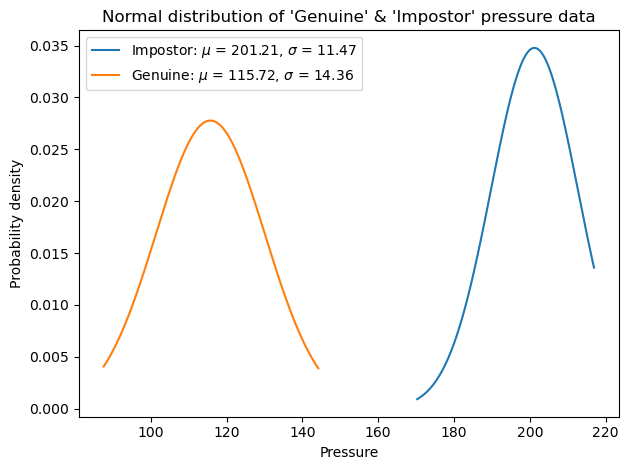

In [71]:
means_array = impostor_pressures[:,0]

arranged_impostor_pressures = np.arange(min(means_array), max(means_array), 0.01)
impostor_pressure_mean = np.mean(means_array)
impostor_pressure_std = np.std(means_array)

impostor_pressure_pdf = norm.pdf(arranged_impostor_pressures, impostor_pressure_mean, impostor_pressure_std)

plt.plot(arranged_impostor_pressures, impostor_pressure_pdf)
plt.plot(arranged_genuine_pressures, genuine_pressure_pdf)
plt.title("Normal distribution of 'Genuine' & 'Impostor' pressure data")
plt.legend([f"Impostor: $\\mu$ = {impostor_pressure_mean:.2f}, $\\sigma$ = {impostor_pressure_std:.2f}",
            f"Genuine: $\\mu$ = {genuine_pressure_mean:.2f}, $\\sigma$ = {genuine_pressure_std:.2f}"])
plt.xlabel('Pressure')
plt.ylabel('Probability density')
plt.show()

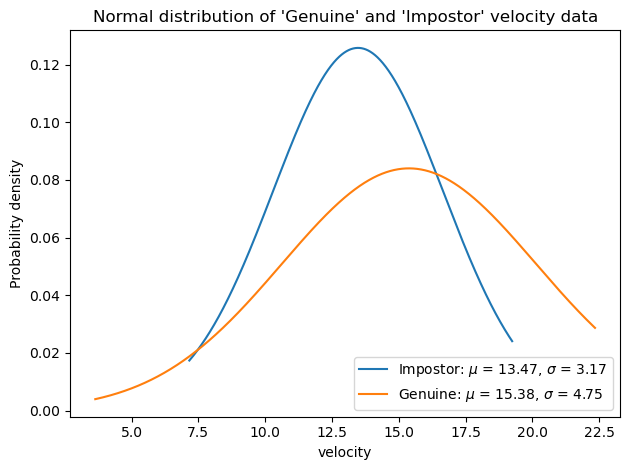

In [70]:
means_array = impostor_velocity[:,0]

arranged_impostor_velocity = np.arange(min(means_array), max(means_array), 0.01)
impostor_velocity_mean = np.mean(means_array)
impostor_velocity_std = np.std(means_array)

impostor_velocity_pdf = norm.pdf(arranged_impostor_velocity, impostor_velocity_mean, impostor_velocity_std)

plt.plot(arranged_impostor_velocity, impostor_velocity_pdf)
plt.plot(arranged_genuine_velocity, genuine_velocity_pdf)
plt.title("Normal distribution of 'Genuine' and 'Impostor' velocity data")
plt.legend([f"Impostor: $\\mu$ = {impostor_velocity_mean:.2f}, $\\sigma$ = {impostor_velocity_std:.2f}",
            f"Genuine: $\\mu$ = {genuine_velocity_mean:.2f}, $\\sigma$ = {genuine_velocity_std:.2f}"])
plt.xlabel('velocity')
plt.ylabel('Probability density')
plt.show()

### Analysis

The difference between the 'genuine' and 'impostor' distributions are quite large, especially for the pressure information. As can be seen in the graph of the pressure distributions, they each center around a different mean; the 'genuine' mean being 115.72 while the 'impostor' mean is 201.21. This difference creates a very distinct mechanism for classifying an individual as 'genuine' or 'impostor' through just the mean alone. As well, the standard deviations differ, but not by much, e.g. 14.36 vs. 11.47, so that is not as major of a difference as the means between the two distributions.

Moving on to the velocity distributions, although they overlap one another the graphs themselves show that the peaks of the distributions differ; the 'genuine' having a higher probability density peak than the 'impostor' distribution. As well, the mean and standard deviation do differ, although only slightly with one another.

## Conclusion

From this lab we can see that theres a variety of data we can gather for something as simple as writing a signature. In this lab we used the pressure and calculated velocity values to help characeterize a signature, instead of using something more perceivable by humans, such as the image of the signature itself. From this collected data of both 'genuine' and 'impostor' signatures we performed statistical analysis and determined that there can be quite stark differences in the input data, which can be used to help verify or recognize a signature. With this information, we can now perform an efficient method of verify or recognizing a signature, while gaining a deeper understanding of the process of data acquisition and statistical analysis which is crucial to biometric system design.

## Loading data
The data folder should be in the same directory as this Notebook

In [22]:
base_dataset = "encm509"
subdir = "genuine"
data_dir = f'signature_samples/{base_dataset}/{subdir}/'

csv_file = pd.read_csv(data_dir + '5.csv')

coord1 = csv_file[['X', 'Y']].to_numpy()
time1 = csv_file['Time'].to_numpy().reshape((-1,1))
prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

csv_file.head()

,X,Y,Pressure,Time
0,408.200140,41.566094,0.226374,0
1,407.496994,41.381518,0.279609,1
2,404.965667,41.117838,0.325763,16
3,406.559465,41.302414,0.303053,16
4,406.559465,41.302414,0.303053,16


## Plotting based on Pressure

In [23]:
# to correctly map the pressure into the colormap the normalization is required 
prs1 = prs1 / np.max(prs1) * 255
prs1 = prs1.astype(int)

pressuremap = plt.get_cmap('jet', np.max(prs1)+1)

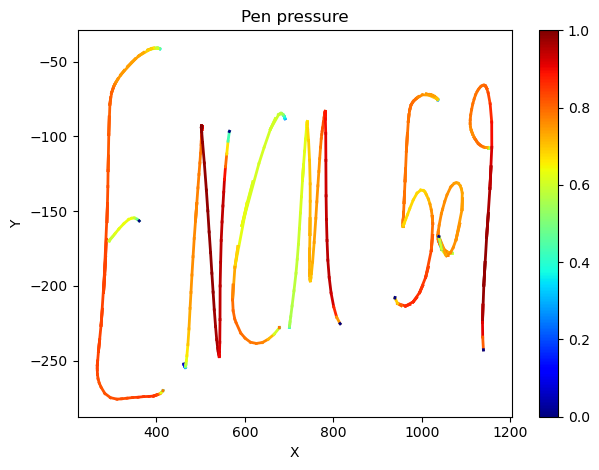

In [24]:
fig, ax = plt.subplots()

for i in range(len(prs1)-1):
    c = pressuremap(prs1[i]).squeeze()
    
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff == 0:
        time_diff = 0.0001
        
    if time_diff < 17: # You may need to change this threshould
        ax.plot(coord1[i:i+2, 0], -coord1[i:i+2, 1], linewidth=2, color=c)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pen pressure')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm, ax=ax);

## Plotting presure over time

In [25]:
# removing outliers (after normalization): < 250 and > 150
prs = []
for x in prs1:
    if (x > 150 and x < 250):
        prs.append(x)

In [26]:
np.max(prs), np.min(prs), np.mean(prs)

(np.int64(248), np.int64(151), np.float64(197.41666666666666))

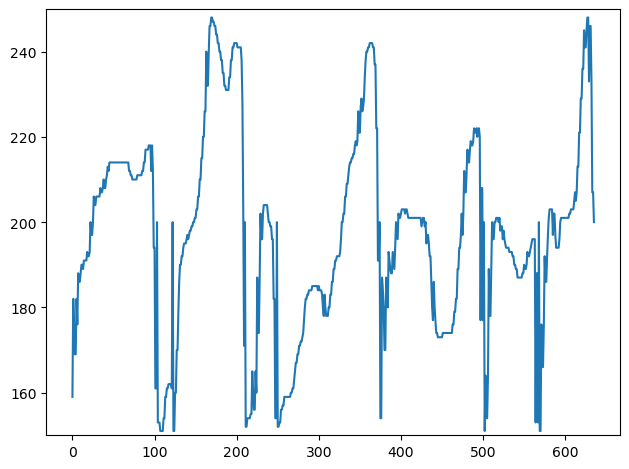

In [27]:
plt.plot(prs)
plt.ylim([150, 250]);

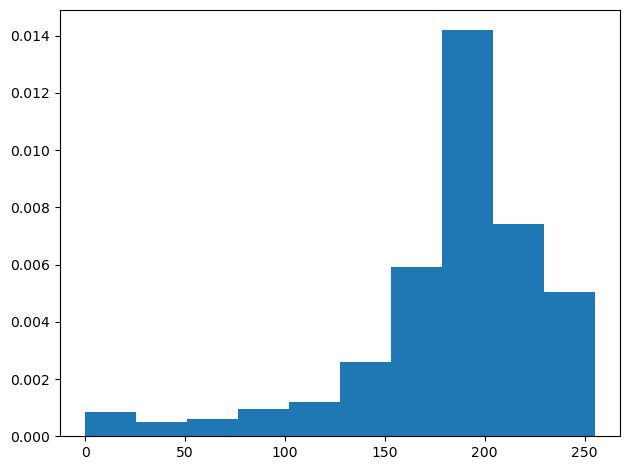

In [28]:
plt.hist(prs1, density=True);

183.59390862944161 48.5714980183646


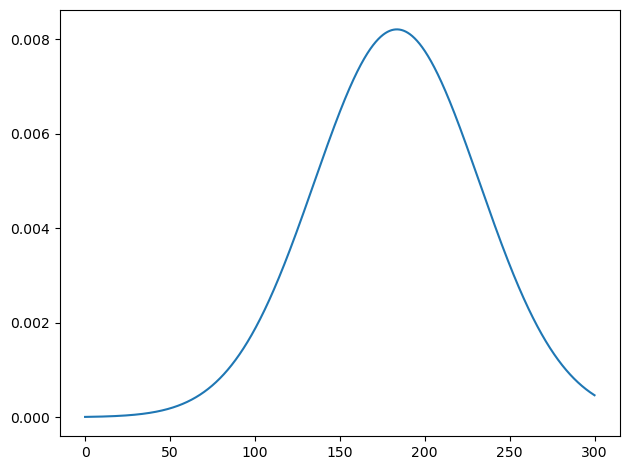

In [29]:
mu_prs = np.mean(prs1)
std_prs = np.std(prs1)
print(mu_prs, std_prs)

x = np.arange(0, 300, 0.01)

x_pdf = norm.pdf(x, loc=mu_prs, scale=std_prs)

plt.plot(x, x_pdf);

## Plotting and calculating the Velocity

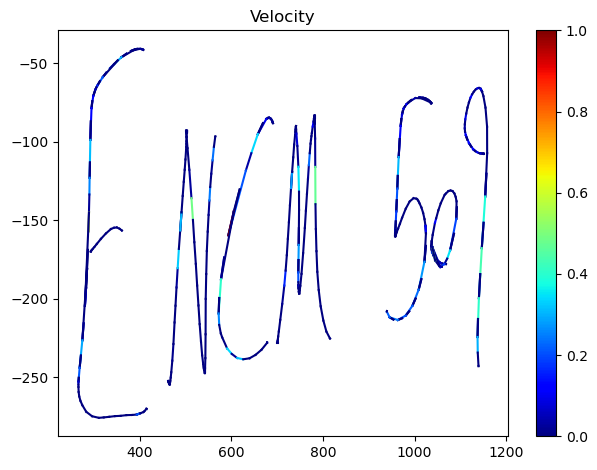

In [30]:
vel = np.zeros((len(time1)-1, 1))
fig, ax = plt.subplots()
for i in range(len(time1)-1):
    distance = np.sqrt((coord1[i+1,0] - coord1[i,0])**2 + 
                       (coord1[i+1,1] - coord1[i,1])**2)

    # if too fast, time_diff = 0
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff != 0:
        vel[i] = distance / time_diff
    vel[i] = int(vel[i].item() * 1000) + 1

vel = np.insert(vel, 0, 1)
vel = vel / np.max(vel) * 255
vel = vel.astype(int)

velmap = plt.get_cmap('jet', np.max(vel)+1)

for i in range(len(vel)-1):
    c = velmap(vel[i])
    
    time_diff = abs(time1[i+1] - time1[i])
        
    if time_diff < 17: # You may need to change this threshould
        ax.plot(coord1[i:i+2,0], -coord1[i:i+2,1], c=c)
plt.title('Velocity')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm, ax = ax);

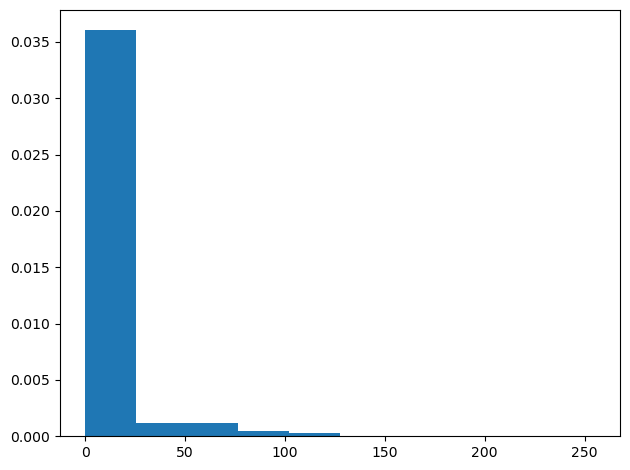

In [31]:
plt.hist(vel, density=True);

## Plotting Pressure in 3D

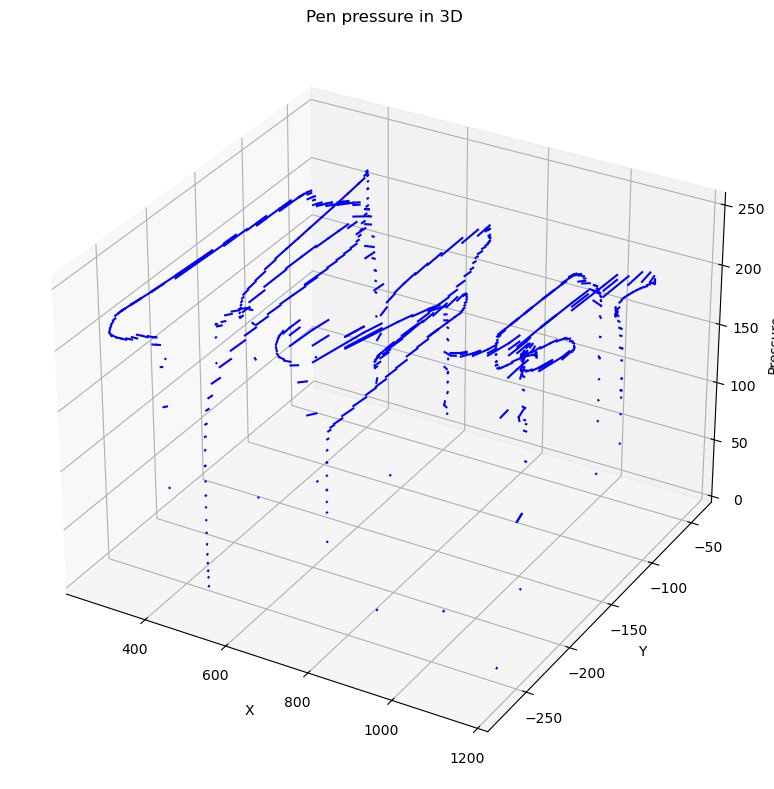

In [32]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for i in range(len(coord1)-1):
    time_diff = abs(time1[i+1] - time1[i])
        
    if time_diff < 18: # You may need to change this threshould
        ax.plot3D(coord1[i:i+2,0], -coord1[i:i+2,1], prs1[i], color='blue')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pressure')
ax.set_title('Pen pressure in 3D');

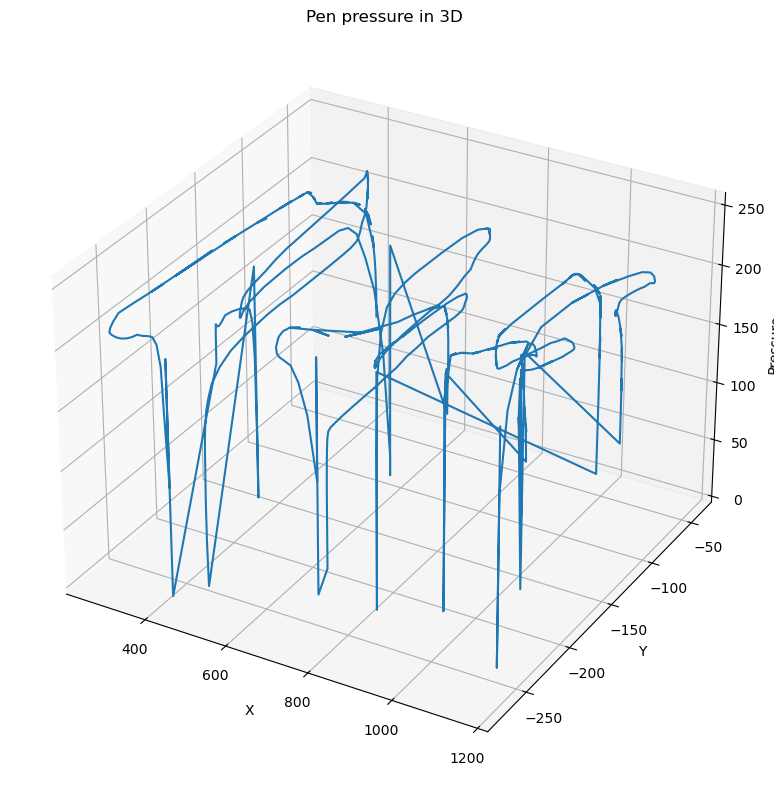

In [33]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.plot3D(coord1[:,0].flatten(), -coord1[:,1].flatten(), prs1.flatten())
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pressure')
ax.set_title('Pen pressure in 3D');

## Statistical Evaluation

In [34]:
# columns: mean_vel, std_vec, mean_prs, std_prs
stats_measures = np.zeros((30,4))

# using 10-30 signatures
for i in range(30):
    csv_file = pd.read_csv(data_dir + '%d.csv' % (i+1))
    
    coord1 = csv_file[['X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time1, coord1)
    
    stats_measures[i, 0] = np.mean(vel)
    stats_measures[i, 1] = np.std(vel)
    
    stats_measures[i, 2] = np.mean(prs1)
    stats_measures[i, 3] = np.std(prs1)
    
    print('#%d - pressure: %.2f; velocity: %.2f' %\
          (i, np.mean(prs1), np.mean(vel)))

#0 - pressure: 0.46; velocity: 16.00
#1 - pressure: 0.46; velocity: 12.33
#2 - pressure: 0.48; velocity: 18.40
#3 - pressure: 0.47; velocity: 14.45
#4 - pressure: 0.46; velocity: 22.63
#5 - pressure: 0.53; velocity: 22.09
#6 - pressure: 0.49; velocity: 12.82
#7 - pressure: 0.50; velocity: 19.85
#8 - pressure: 0.50; velocity: 8.11
#9 - pressure: 0.47; velocity: 11.41
#10 - pressure: 0.51; velocity: 8.21
#11 - pressure: 0.58; velocity: 8.65
#12 - pressure: 0.58; velocity: 7.23
#13 - pressure: 0.48; velocity: 17.67
#14 - pressure: 0.51; velocity: 16.50
#15 - pressure: 0.55; velocity: 8.25
#16 - pressure: 0.58; velocity: 23.29
#17 - pressure: 0.59; velocity: 7.66
#18 - pressure: 0.59; velocity: 7.48
#19 - pressure: 0.56; velocity: 7.59
#20 - pressure: 0.58; velocity: 18.07
#21 - pressure: 0.56; velocity: 16.21
#22 - pressure: 0.57; velocity: 9.57
#23 - pressure: 0.56; velocity: 7.77
#24 - pressure: 0.61; velocity: 15.40
#25 - pressure: 0.60; velocity: 17.60
#26 - pressure: 0.56; velocity: 

In [35]:
# getting only the 1st velocity 'mean' and 'std'
print(stats_measures[0,0], stats_measures[0,1])

n = norm(stats_measures[0,0], stats_measures[0,1])

16.00494071146245 38.759405020790176


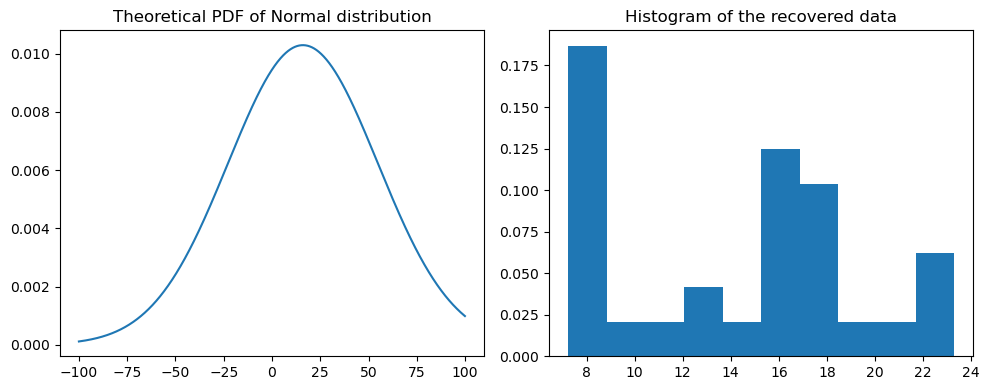

In [36]:
x = np.arange(-100, 100, 0.1)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, n.pdf(x))
plt.title('Theoretical PDF of Normal distribution');

plt.subplot(1,2,2)
plt.hist(stats_measures[:,0], density=True);
plt.title('Histogram of the recovered data');

# put the name of the set in the title

## Exercises

**General Marks**
1. Introduction (a paragraph about the purpose of the lab).
2. (10 marks) Description of the result on each exercise  with illustrations/graphs and analysis of the results (marks are distributed as shown in the Exercise section).
3. Conclusion (a paragraph on what is the main take-out of the lab).

- **Exercise 1** (2 marks): Consider a random sample of a normally distributed data with mean $\mu = 50$ and standard deviation $\sigma = 5$. The Scipy's function `norm.rvs(...)` is used to draw samples from a normal distribution.
- Create another set of 1000 samples with $\mu = 50$ and $\sigma = 5$.
- Plot the histogram with 100 bins.
- Compare the results of the calculations of both sets. What conclusions can be drawn from the amount of samples compared with the mean and standard deviation calculated and the number of bins considered? 

- **Exercise 2** (1 marks): Consider a sample data of the word *Biometrics* written by a "genuine" person, and an "impostor" as a signature that replicates the shape but not the original pressure. Load the sample signature provided. Plot the signature in 2D with the color representing the pressure on each point. Similarly to calculation of the mean and std of the random data, calculate the mean and std of the pressure for one signature, and plot the Normal distribution.

- **Exercise 3** (1 mark): The code to calculate velocity and plot velocity map of one signature, provided in this lab, has the following `if` statement: `if time_diff == 0:`. 
    - Explain why it is necessary.
    - Plot in 3D, where the third coordinate represents pressure.

- **Exercise 4** (3 marks): Now  perform statistical analysis of pressure and velocity distribution  across average values of pressure or 30 signatures of the same person. We will represent the pressure of each signature by its average (mean) value, and then consider the distribution of these average values across genuine signatures. Consider 30 genuine signatures (yours or pre-recorded sample set, part a), and calculate average (mean) values and deviation from average (which will be calculated using standard deviation) for pressure. Plot a normal distribution of the average pressure values across the 30 signatures of the same individual. Perform the same for velocity. 

- **Exercise 5** (3 marks): Perform statistical analysis of average pressure and velocity distribution across 30 impostor signatures. As an "impostor", you can use either the 30 "forged" signatures (or part $b$ of the pre-recorded set), or 30 writings by yourself, of different shape/word (or part $c$ of the pre-recorded set). Represent the pressure (or velocity) of each signature by its average (mean), and then consider the distribution of these averages across 30 impostor signatures. How different are those distributions for "genuine" signatures from Exercise 4 and the "impostor" from Exercise 5?